# Training "baseline" approach

## Preparation

In [38]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

In [39]:
project_path = Path().resolve().parent
input_path = project_path / "results" / "intermediate" / "training" / "baseline"
#output_path = project_path / "results" / "MGE_files"

## Joined performance

In [48]:
performance=pd.DataFrame(columns=['genome', 'n_threshold', 'nr_tool', 'nr_toolscheme', 'nr_scheme', 'avge_dispersion', 'coverage_denominator', 'coverage_numerator'])
#performance = pd.read_csv(input_path / str(i) / "joined_performance.csv", engine="python")
for i in [10, 20, 30]:
    perf = pd.read_csv(input_path / str(i) / "joined_performance.csv", engine="python", names=['genome', 'n_threshold', 'nr_tool', 'nr_toolscheme', 'nr_scheme', 'avge_dispersion', 'coverage_denominator', 'coverage_numerator'], header=None)
    performance=pd.concat([performance, perf])
performance['dispersion_weighted']=(performance.nr_toolscheme)*(pd.to_numeric(performance.avge_dispersion, errors='coerce'))
performance

,genome,n_threshold,nr_tool,nr_toolscheme,nr_scheme,avge_dispersion,coverage_denominator,coverage_numerator,dispersion_weighted
0,GCA_000820965.2,10,2,2,7,1.0,38,30,2.0
1,GCA_000963335.1,10,3,1,8,1.0,20,16,1.0
2,GCA_002860885.1,10,5,1,8,1.0,5,3,1.0
3,GCA_001682765.1,10,3,2,11,1.0,81,72,2.0
4,GCA_002289685.1,10,8,6,14,1.0,129,122,6.0
...,...,...,...,...,...,...,...,...,...
45,GCA_900092635.1,30,11,6,10,1.0,163,116,6.0
46,GCA_001754025.1,30,4,1,2,1.0,55,28,1.0
47,GCA_003186985.1,30,1,0,0,None,0,0,NaN
48,GCA_002138395.1,30,5,3,4,1.0,143,143,3.0


In [49]:
measures=performance.groupby(by='n_threshold', axis=0).sum()
measures=measures.loc[:, ['nr_tool', 'nr_toolscheme', 'nr_scheme', 'coverage_denominator', 'dispersion_weighted', 'coverage_numerator']]

In [50]:
measures['precision']=measures.nr_toolscheme/measures.nr_scheme
measures['recall']=measures.nr_toolscheme/measures.nr_tool
measures['coverage']=measures.coverage_numerator/measures.coverage_denominator
measures['dispersion']=measures.dispersion_weighted/measures.nr_toolscheme
measures['F-score']=2*measures.precision*measures.recall/(measures.precision+measures.recall)
m=measures.loc[:,['precision', 'recall', 'F-score', 'dispersion', 'coverage']]

In [34]:
m

,precision,recall,F-score,dispersion,coverage
n_threshold,,,,,
10,0.224913,0.628019,0.331210,1.069231,0.845990
20,0.453704,0.473430,0.463357,1.020408,0.865283
30,0.553719,0.323671,0.408537,1.000000,0.862339


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


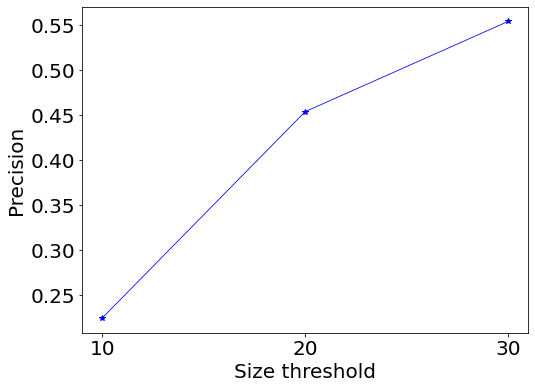

In [35]:
font = {'family' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([10, 20, 30],m.iloc[i:i+3,0], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Size threshold")
ax.set_xticks([10, 20, 30])
#ax.set_
#ax.set_xticklabels([10, 20, 30], fontsize=12)
ax.set_ylabel("Precision")
#ax.set_yticklabels(fontsize=20)
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_baseline_precision_size.png", bbox_inches='tight')


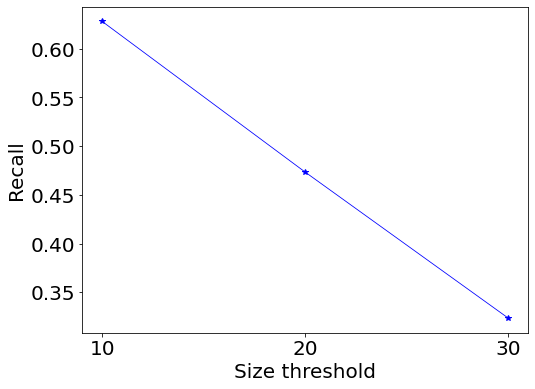

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([10, 20, 30],m.iloc[i:i+3,1], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Size threshold")
ax.set_xticks([10, 20, 30])
#ax.set_
#ax.set_xticklabels([10, 20, 30], fontsize=12)
ax.set_ylabel("Recall")
#ax.set_yticklabels(fontsize=20)
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_baseline_recall_size.png", bbox_inches='tight')


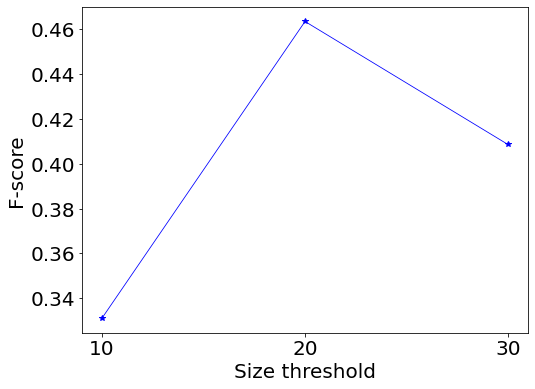

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(0, len(m), 3):
    #print(i/3)
    #print(m.iloc[i:i+3,-1])
    ax.plot([10, 20, 30],m.iloc[i:i+3,2], "-*", linewidth=0.8, c='b')
ax.set_xlabel("Size threshold")
ax.set_xticks([10, 20, 30])
#ax.set_
#ax.set_xticklabels([10, 20, 30], fontsize=12)
ax.set_ylabel("F-score")
#ax.set_yticklabels(fontsize=20)
#ax.legend()
#plt.show()
plt.savefig(project_path / "results" / "statistics" / "training_baseline_F_size.png", bbox_inches='tight')
